# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from pprint import pprint
#from citipy import citipy
import random
from api_keys import weather_api_key as wkey

## Generate Cities List

In [102]:
"""As percentage of water on Earth is 71%, there is only 29% chance that searching for a city with random latitudes and 
longitudes will return an actual city, so instead of using citipy I copied "worldcities.csv" file from citipy documentations,
then separated columns using Excel"""

world_cities_df = pd.read_csv('worldcities.csv')
# print(len(world_cities_df)) --> 46832

#Create cities_df as a subset from worldcities with rows randomly chosen based on a fixed seed
random.seed(4)
random_indices = random.sample(range(46832),600)
country = []
city = []
lat = []
lng = []
for index in random_indices:
    country.append(world_cities_df.loc[index,'Country'])
    city.append(world_cities_df.loc[index,'City'])
    lat.append(world_cities_df.loc[index,'Latitude'])
    lng.append(world_cities_df.loc[index,'Longitude'])
cities_df = pd.DataFrame({'Country':country, 'City':city, 'Latitude':lat, 'Longitude':lng})

#Add City-ID column

cities_df.reset_index(inplace=True)
cities_df = cities_df.rename(columns={'index':'City_ID'})
cities_df.head()


,City_ID,Country,City,Latitude,Longitude
0,0,hu,csengele,46.542336,19.863584
1,1,ir,delijan,33.990500,50.683800
2,2,co,colon,1.191167,-76.968500
3,3,no,lyngseidet,69.583333,20.216667
4,4,pl,trzebiatow,54.059404,15.279377


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [103]:
#Testing OpenWeatherMap API response by city name and state code for first city in cities_df
url = f'https://api.openweathermap.org/data/2.5/weather?appid={wkey}'
city = 'csengele,hu'
params = {'q':city, 'units':'imperial'}
response = requests.get(url, params).json()
pprint(response)
temperature = response['main']['temp']
humidity = response['main']['humidity']
cloudiness = response['clouds']['all']
wind_speed = response['wind']['speed']
date = response['dt']

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 46.5423, 'lon': 19.8636},
 'dt': 1631602612,
 'id': 3054287,
 'main': {'feels_like': 65.98,
          'grnd_level': 1007,
          'humidity': 78,
          'pressure': 1017,
          'sea_level': 1017,
          'temp': 66.02,
          'temp_max': 66.02,
          'temp_min': 64.6},
 'name': 'Csengele',
 'sys': {'country': 'HU',
         'id': 2003057,
         'sunrise': 1631593032,
         'sunset': 1631638517,
         'type': 2},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 3, 'gust': 7.52, 'speed': 6.49}}


In [104]:
#Make API calls to collect data for all cities
url = f'https://api.openweathermap.org/data/2.5/weather?appid={wkey}'
cities_df['Temperature'] = ''
cities_df['Humidity'] = ''
cities_df['Cloudiness'] = ''
cities_df['Wind Speed'] = ''
cities_df['Date'] = ''
print('Beginning Data Retrieval')
print('----------------------------')
for index,row in cities_df.iterrows():
    city_name = row['City']
    state_code = row['Country']
    city = city_name+','+state_code
    params = {'q':city, 'units':'imperial'}
    response = requests.get(url,params).json()
    try:
        cities_df.loc[index,'Temperature'] = response['main']['temp']
        cities_df.loc[index,'Humidity'] = response['main']['humidity']
        cities_df.loc[index,'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index,'Wind Speed'] = response['wind']['speed']
        cities_df.loc[index,'Date'] = response['dt']
        print(f'Processing Record {index} of cities_df | {city_name}')
    except KeyError:
        print('City not found. Skipping...')
        continue


Beginning Data Retrieval
----------------------------
Processing Record 0 of cities_df | csengele
Processing Record 1 of cities_df | delijan
Processing Record 2 of cities_df | colon
Processing Record 3 of cities_df | lyngseidet
Processing Record 4 of cities_df | trzebiatow
Processing Record 5 of cities_df | storvorde
Processing Record 6 of cities_df | datong
Processing Record 7 of cities_df | sefophe
Processing Record 8 of cities_df | kaliganj
Processing Record 9 of cities_df | waitati
Processing Record 10 of cities_df | ilovka
Processing Record 11 of cities_df | patnagarh
Processing Record 12 of cities_df | santa cruz do sul
Processing Record 13 of cities_df | panzos
Processing Record 14 of cities_df | salatrucu
Processing Record 15 of cities_df | anuchino
Processing Record 16 of cities_df | cintalapa
Processing Record 17 of cities_df | kant
City not found. Skipping...
Processing Record 19 of cities_df | jardin
Processing Record 20 of cities_df | barsi
City not found. Skipping...
Proc

Processing Record 184 of cities_df | monterey park
Processing Record 185 of cities_df | dauin
City not found. Skipping...
Processing Record 187 of cities_df | ciprian porumbescu
Processing Record 188 of cities_df | bentley
Processing Record 189 of cities_df | svilengrad
Processing Record 190 of cities_df | auriflama
Processing Record 191 of cities_df | lifford
Processing Record 192 of cities_df | buncrana
Processing Record 193 of cities_df | otteveny
City not found. Skipping...
City not found. Skipping...
Processing Record 196 of cities_df | san pedro de tutule
Processing Record 197 of cities_df | basa
Processing Record 198 of cities_df | barpathar
Processing Record 199 of cities_df | melle
Processing Record 200 of cities_df | haebaru
Processing Record 201 of cities_df | mata de sao joao
Processing Record 202 of cities_df | merate
Processing Record 203 of cities_df | mirskoy
Processing Record 204 of cities_df | agramonte
Processing Record 205 of cities_df | novopistsovo
Processing Reco

Processing Record 365 of cities_df | makir
Processing Record 366 of cities_df | kranuan
City not found. Skipping...
Processing Record 368 of cities_df | mambulo
Processing Record 369 of cities_df | soest
Processing Record 370 of cities_df | lingen
Processing Record 371 of cities_df | simpang
Processing Record 372 of cities_df | yertarskiy
Processing Record 373 of cities_df | duarte
Processing Record 374 of cities_df | villa park
Processing Record 375 of cities_df | beruwala
Processing Record 376 of cities_df | dreieich
Processing Record 377 of cities_df | kabacan
Processing Record 378 of cities_df | lyss
Processing Record 379 of cities_df | skalica
Processing Record 380 of cities_df | osterholz-scharmbeck
Processing Record 381 of cities_df | west point
Processing Record 382 of cities_df | chishan
Processing Record 383 of cities_df | grand-couronne
Processing Record 384 of cities_df | muzaffarpur
Processing Record 385 of cities_df | rodeo
Processing Record 386 of cities_df | southport
P

Processing Record 545 of cities_df | nixa
Processing Record 546 of cities_df | vozuca
Processing Record 547 of cities_df | khoy
Processing Record 548 of cities_df | hadsund
Processing Record 549 of cities_df | avarua
Processing Record 550 of cities_df | sanchez
Processing Record 551 of cities_df | miramar
Processing Record 552 of cities_df | juayua
Processing Record 553 of cities_df | pushkino
Processing Record 554 of cities_df | tamara
Processing Record 555 of cities_df | san lucas
Processing Record 556 of cities_df | kharp
Processing Record 557 of cities_df | asten
Processing Record 558 of cities_df | nowy tomysl
Processing Record 559 of cities_df | jagodina
Processing Record 560 of cities_df | vannes
Processing Record 561 of cities_df | real
Processing Record 562 of cities_df | barinas
Processing Record 563 of cities_df | new hyde park
Processing Record 564 of cities_df | lamesa
Processing Record 565 of cities_df | xalmimilulco
Processing Record 566 of cities_df | nakuru
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [106]:
cities_df.to_csv('Cities.csv')
cities_df.head()

,City_ID,Country,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
0,0,hu,csengele,46.542336,19.863584,66.02,78,12,6.49,1631602612
1,1,ir,delijan,33.990500,50.683800,86.07,10,0,4.83,1631602614
2,2,co,colon,1.191167,-76.968500,49.64,84,0,2.28,1631602615
3,3,no,lyngseidet,69.583333,20.216667,42.89,98,100,3.33,1631602617
4,4,pl,trzebiatow,54.059404,15.279377,57.47,78,100,5.48,1631602618


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [107]:
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City_ID      600 non-null    int64  
 1   Country      600 non-null    object 
 2   City         600 non-null    object 
 3   Latitude     600 non-null    float64
 4   Longitude    600 non-null    float64
 5   Temperature  600 non-null    object 
 6   Humidity     600 non-null    object 
 7   Cloudiness   600 non-null    object 
 8   Wind Speed   600 non-null    object 
 9   Date         600 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 47.0+ KB


In [108]:
#Convert Temperature, Humidity, Cloudiness, Wind Speed and date to numeric
cities_df['Temperature'] = pd.to_numeric(cities_df['Temperature'])
cities_df['Humidity'] = pd.to_numeric(cities_df['Humidity'])
cities_df['Cloudiness'] = pd.to_numeric(cities_df['Cloudiness'])
cities_df['Wind Speed'] = pd.to_numeric(cities_df['Wind Speed']) 
cities_df['Date'] = pd.to_numeric(cities_df['Date'])
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City_ID      600 non-null    int64  
 1   Country      600 non-null    object 
 2   City         600 non-null    object 
 3   Latitude     600 non-null    float64
 4   Longitude    600 non-null    float64
 5   Temperature  570 non-null    float64
 6   Humidity     570 non-null    float64
 7   Cloudiness   570 non-null    float64
 8   Wind Speed   570 non-null    float64
 9   Date         570 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 47.0+ KB


In [109]:
#Remove rows with Nan values
cities_df.dropna(inplace=True)
cities_df.head()

,City_ID,Country,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
0,0,hu,csengele,46.542336,19.863584,66.02,78.0,12.0,6.49,1.631603e+09
1,1,ir,delijan,33.990500,50.683800,86.07,10.0,0.0,4.83,1.631603e+09
2,2,co,colon,1.191167,-76.968500,49.64,84.0,0.0,2.28,1.631603e+09
3,3,no,lyngseidet,69.583333,20.216667,42.89,98.0,100.0,3.33,1.631603e+09
4,4,pl,trzebiatow,54.059404,15.279377,57.47,78.0,100.0,5.48,1.631603e+09


In [110]:
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 599
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City_ID      570 non-null    int64  
 1   Country      570 non-null    object 
 2   City         570 non-null    object 
 3   Latitude     570 non-null    float64
 4   Longitude    570 non-null    float64
 5   Temperature  570 non-null    float64
 6   Humidity     570 non-null    float64
 7   Cloudiness   570 non-null    float64
 8   Wind Speed   570 non-null    float64
 9   Date         570 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 49.0+ KB


In [111]:
#Remove rows where humidity is > 100% if any exists
cities_df = cities_df.loc[(cities_df['Humidity']<=100)]
cities_df

,City_ID,Country,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
0,0,hu,csengele,46.542336,19.863584,66.02,78.0,12.0,6.49,1.631603e+09
1,1,ir,delijan,33.990500,50.683800,86.07,10.0,0.0,4.83,1.631603e+09
2,2,co,colon,1.191167,-76.968500,49.64,84.0,0.0,2.28,1.631603e+09
3,3,no,lyngseidet,69.583333,20.216667,42.89,98.0,100.0,3.33,1.631603e+09
4,4,pl,trzebiatow,54.059404,15.279377,57.47,78.0,100.0,5.48,1.631603e+09
...,...,...,...,...,...,...,...,...,...,...
595,595,br,bom jardim,-7.016667,-46.483333,68.77,95.0,91.0,3.15,1.631603e+09
596,596,sk,dunajska streda,47.983333,17.616667,65.39,80.0,100.0,3.89,1.631603e+09
597,597,it,vignola,44.483333,11.000000,73.49,54.0,98.0,0.76,1.631603e+09
598,598,ro,tulca,46.783333,21.783333,69.84,56.0,0.0,13.80,1.631603e+09


In [112]:
#Create a data frame that will hold data for cities_df quartiles
cities_measures = cities_df.describe()
cities_measures

,City_ID,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,302.861404,29.816030,15.053949,69.648632,71.445614,56.601754,5.772474,1.631603e+09
std,174.084853,22.974196,72.695669,12.044812,21.039373,41.541615,4.779234,2.159864e+02
min,0.000000,-46.400000,-171.916667,17.800000,9.000000,0.000000,0.000000,1.631602e+09
25%,150.250000,14.510050,-46.287500,61.212500,59.000000,8.000000,2.300000,1.631603e+09
50%,305.500000,38.056388,20.208334,69.840000,76.000000,72.000000,4.340000,1.631603e+09
75%,454.750000,47.295833,70.013703,77.280000,89.000000,100.000000,7.735000,1.631603e+09
max,599.000000,69.583333,177.283333,106.920000,100.000000,100.000000,26.460000,1.631603e+09


In [113]:
#Calculate IQR and outbounds for humidity to check for outliers
iqr = cities_measures.loc['75%','Humidity'] - cities_measures.loc['25%','Humidity']
upper_limit = cities_measures.loc['75%','Humidity']+(1.5*iqr)
lower_limit = cities_measures.loc['25%','Humidity']-(1.5*iqr)

#Create clean_df where humidity outliers removed
clean_df = cities_df.loc[(cities_df['Humidity']>lower_limit) & (cities_df['Humidity']<upper_limit)]
clean_df

,City_ID,Country,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
0,0,hu,csengele,46.542336,19.863584,66.02,78.0,12.0,6.49,1.631603e+09
2,2,co,colon,1.191167,-76.968500,49.64,84.0,0.0,2.28,1.631603e+09
3,3,no,lyngseidet,69.583333,20.216667,42.89,98.0,100.0,3.33,1.631603e+09
4,4,pl,trzebiatow,54.059404,15.279377,57.47,78.0,100.0,5.48,1.631603e+09
5,5,dk,storvorde,57.003916,10.101252,57.52,98.0,90.0,0.00,1.631603e+09
...,...,...,...,...,...,...,...,...,...,...
595,595,br,bom jardim,-7.016667,-46.483333,68.77,95.0,91.0,3.15,1.631603e+09
596,596,sk,dunajska streda,47.983333,17.616667,65.39,80.0,100.0,3.89,1.631603e+09
597,597,it,vignola,44.483333,11.000000,73.49,54.0,98.0,0.76,1.631603e+09
598,598,ro,tulca,46.783333,21.783333,69.84,56.0,0.0,13.80,1.631603e+09


In [114]:
#Calculate IQR and outbounds for temperature to check for outliers
iqr = cities_measures.loc['75%','Temperature'] - cities_measures.loc['25%','Temperature']
upper_limit = cities_measures.loc['75%','Temperature']+(1.5*iqr)
lower_limit = cities_measures.loc['25%','Temperature']-(1.5*iqr)

#update clean_df to remove temperature outliers
clean_df = clean_df.loc[(clean_df['Temperature']>lower_limit) & (clean_df['Temperature']<upper_limit)]
clean_df

,City_ID,Country,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
0,0,hu,csengele,46.542336,19.863584,66.02,78.0,12.0,6.49,1.631603e+09
2,2,co,colon,1.191167,-76.968500,49.64,84.0,0.0,2.28,1.631603e+09
3,3,no,lyngseidet,69.583333,20.216667,42.89,98.0,100.0,3.33,1.631603e+09
4,4,pl,trzebiatow,54.059404,15.279377,57.47,78.0,100.0,5.48,1.631603e+09
5,5,dk,storvorde,57.003916,10.101252,57.52,98.0,90.0,0.00,1.631603e+09
...,...,...,...,...,...,...,...,...,...,...
595,595,br,bom jardim,-7.016667,-46.483333,68.77,95.0,91.0,3.15,1.631603e+09
596,596,sk,dunajska streda,47.983333,17.616667,65.39,80.0,100.0,3.89,1.631603e+09
597,597,it,vignola,44.483333,11.000000,73.49,54.0,98.0,0.76,1.631603e+09
598,598,ro,tulca,46.783333,21.783333,69.84,56.0,0.0,13.80,1.631603e+09


In [115]:
#Calculate IQR and outbounds for cloudiness to check for outliers
iqr = cities_measures.loc['75%','Cloudiness'] - cities_measures.loc['25%','Cloudiness']
upper_limit = cities_measures.loc['75%','Cloudiness']+(1.5*iqr)
lower_limit = cities_measures.loc['25%','Cloudiness']-(1.5*iqr)

#update clean_df to remove cloudiness outliers
clean_df = clean_df.loc[(clean_df['Cloudiness']>lower_limit) & (clean_df['Cloudiness']<upper_limit)]
clean_df

,City_ID,Country,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
0,0,hu,csengele,46.542336,19.863584,66.02,78.0,12.0,6.49,1.631603e+09
2,2,co,colon,1.191167,-76.968500,49.64,84.0,0.0,2.28,1.631603e+09
3,3,no,lyngseidet,69.583333,20.216667,42.89,98.0,100.0,3.33,1.631603e+09
4,4,pl,trzebiatow,54.059404,15.279377,57.47,78.0,100.0,5.48,1.631603e+09
5,5,dk,storvorde,57.003916,10.101252,57.52,98.0,90.0,0.00,1.631603e+09
...,...,...,...,...,...,...,...,...,...,...
595,595,br,bom jardim,-7.016667,-46.483333,68.77,95.0,91.0,3.15,1.631603e+09
596,596,sk,dunajska streda,47.983333,17.616667,65.39,80.0,100.0,3.89,1.631603e+09
597,597,it,vignola,44.483333,11.000000,73.49,54.0,98.0,0.76,1.631603e+09
598,598,ro,tulca,46.783333,21.783333,69.84,56.0,0.0,13.80,1.631603e+09


In [121]:
#Calculate IQR and outbounds for wind speed to check for outliers
iqr = cities_measures.loc['75%','Wind Speed'] - cities_measures.loc['25%','Wind Speed']
upper_limit = cities_measures.loc['75%','Wind Speed']+(1.5*iqr)
lower_limit = cities_measures.loc['25%','Wind Speed']-(1.5*iqr)

#update clean_df to remove wind speed outliers
clean_df = clean_df.loc[(clean_df['Wind Speed']>lower_limit) & (clean_df['Wind Speed']<upper_limit)]
clean_df

,City_ID,Country,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
0,0,hu,csengele,46.542336,19.863584,66.02,78.0,12.0,6.49,2021-09-14 06:56:52
2,2,co,colon,1.191167,-76.968500,49.64,84.0,0.0,2.28,2021-09-14 06:56:55
3,3,no,lyngseidet,69.583333,20.216667,42.89,98.0,100.0,3.33,2021-09-14 06:56:57
4,4,pl,trzebiatow,54.059404,15.279377,57.47,78.0,100.0,5.48,2021-09-14 06:56:58
5,5,dk,storvorde,57.003916,10.101252,57.52,98.0,90.0,0.00,2021-09-14 06:57:00
...,...,...,...,...,...,...,...,...,...,...
595,595,br,bom jardim,-7.016667,-46.483333,68.77,95.0,91.0,3.15,2021-09-14 07:08:09
596,596,sk,dunajska streda,47.983333,17.616667,65.39,80.0,100.0,3.89,2021-09-14 07:08:10
597,597,it,vignola,44.483333,11.000000,73.49,54.0,98.0,0.76,2021-09-14 07:08:12
598,598,ro,tulca,46.783333,21.783333,69.84,56.0,0.0,13.80,2021-09-14 07:08:14


In [120]:
#Convert Date values to datetime values
clean_df['Date'] = pd.to_datetime(clean_df['Date'], unit='s')
clean_df

C:\Users\tamer\AppData\Local\Temp/ipykernel_4200/975805280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Date'] = pd.to_datetime(clean_df['Date'], unit='s')


,City_ID,Country,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
0,0,hu,csengele,46.542336,19.863584,66.02,78.0,12.0,6.49,2021-09-14 06:56:52
2,2,co,colon,1.191167,-76.968500,49.64,84.0,0.0,2.28,2021-09-14 06:56:55
3,3,no,lyngseidet,69.583333,20.216667,42.89,98.0,100.0,3.33,2021-09-14 06:56:57
4,4,pl,trzebiatow,54.059404,15.279377,57.47,78.0,100.0,5.48,2021-09-14 06:56:58
5,5,dk,storvorde,57.003916,10.101252,57.52,98.0,90.0,0.00,2021-09-14 06:57:00
...,...,...,...,...,...,...,...,...,...,...
595,595,br,bom jardim,-7.016667,-46.483333,68.77,95.0,91.0,3.15,2021-09-14 07:08:09
596,596,sk,dunajska streda,47.983333,17.616667,65.39,80.0,100.0,3.89,2021-09-14 07:08:10
597,597,it,vignola,44.483333,11.000000,73.49,54.0,98.0,0.76,2021-09-14 07:08:12
598,598,ro,tulca,46.783333,21.783333,69.84,56.0,0.0,13.80,2021-09-14 07:08:14


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

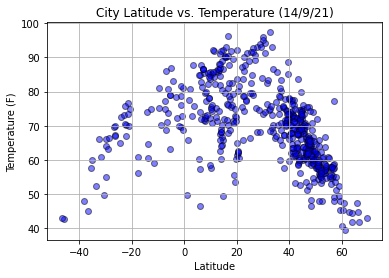

In [130]:
x_values = clean_df['Latitude']
y_values = clean_df['Temperature']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('City Latitude vs. Temperature (14/9/21)')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

##### The scatter plot shows that cities far from the equator are the coldest cities, although it is expected that near the equator cities should be warmer, temperatures recorded for 14/9/2021 show that the warmest cities were around 20 degrees north of the equator



## Latitude vs. Humidity Plot

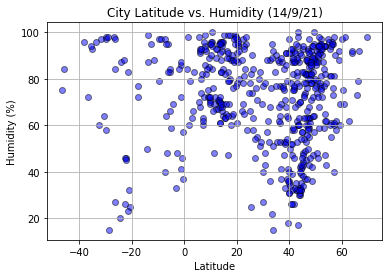

In [131]:
x_values = clean_df['Latitude']
y_values = clean_df['Humidity']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (14/9/21)')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

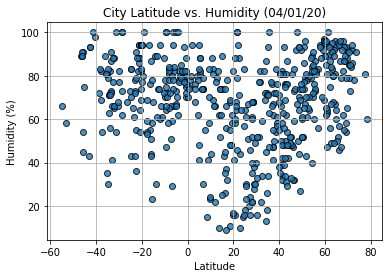

## Latitude vs. Cloudiness Plot

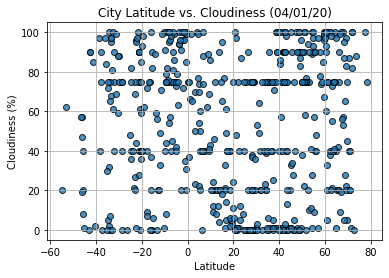

## Latitude vs. Wind Speed Plot

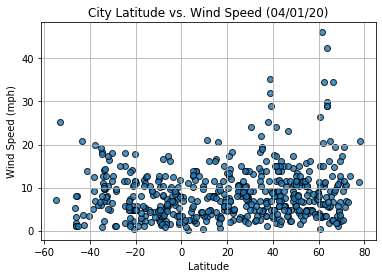

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


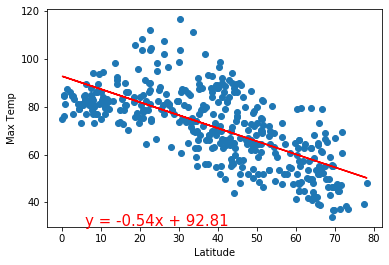

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


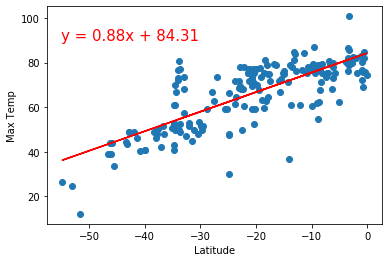

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


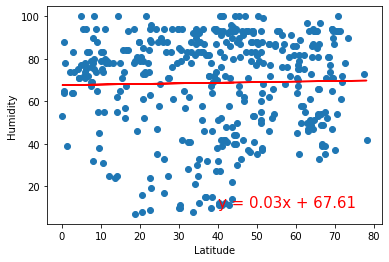

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


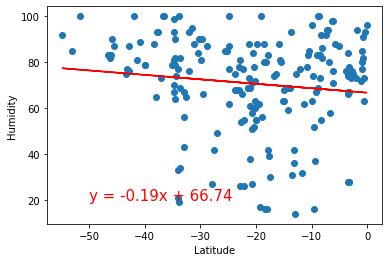

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


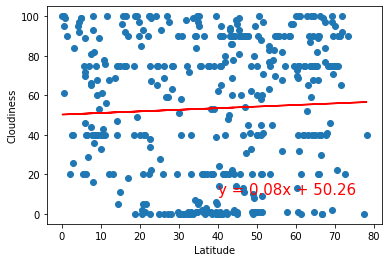

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


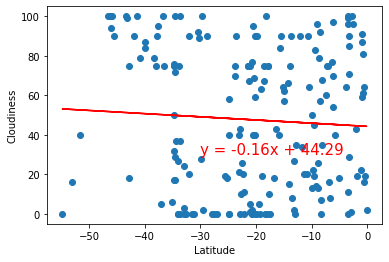

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


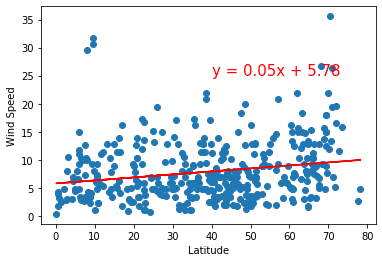

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


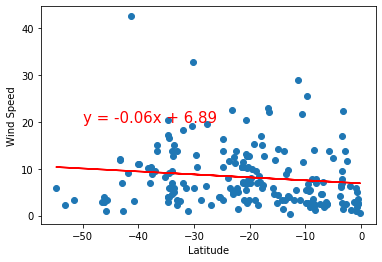